In [29]:
'''Business understanding by CRISP-DM: When traveling to an unfamilar city, a travller seeking accomodation is interested in know the 
availability, property types, pricing according to neighbourhoods, busy period in the city, pricing over different seasons etc. 

In this notebook I plan to answer two questions from the provided data sets. 
1. what are different property types available in Seattle? 
2. How are availability distribution of most popular property type in Seattle?
3. A map showing distribution of the most available accomodation type in Seattle (similar to Craigslist mapping option)
4. How is the pricing distribtuions according to neighbourhoods and property types? 
5. what are the pricing movements over the time period available in the Seattle data sets?

There is no modeling compoment in answering these questions.
So the steps involved are data gathering, assessing, cleaning, analyzing and visulatization.
'''

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
import datetime
import folium #Longitude and Lattitude mapping.
from folium import plugins
from folium.plugins import MarkerCluster #To be able to cluster our individual data points on folium.
from IPython.display import HTML, display

In [30]:
# Data gathering
dfs_calendar = pd.read_csv('C:/Users/vinym/Documents/Py_ML_Deep/Udacity_NanodegreeCourse/Project1/Seattle_AirBnB_Kaggle/calendar.csv')
dfs_listings = pd.read_csv('C:/Users/vinym/Documents/Py_ML_Deep/Udacity_NanodegreeCourse/Project1/Seattle_AirBnB_Kaggle/listings.csv')
dfs_reviews = pd.read_csv('C:/Users/vinym/Documents/Py_ML_Deep/Udacity_NanodegreeCourse/Project1/Seattle_AirBnB_Kaggle/reviews.csv')

In [5]:
# A first check of different csv data - data types, enteries, columns, missing data (non-null items), min and max
dfs_calendar.info()
dfs_calendar.shape[0]
dfs_calendar.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


,listing_id
count,1.393570e+06
mean,5.550111e+06
std,2.962274e+06
min,3.335000e+03
25%,3.258213e+06
50%,6.118244e+06
75%,8.035212e+06
max,1.034016e+07


In [6]:
dfs_listings.info()
dfs_listings.shape[0]
dfs_listings.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [7]:
dfs_reviews.info()
dfs_reviews.shape[0]
dfs_reviews.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


,listing_id,id,reviewer_id
count,8.484900e+04,8.484900e+04,8.484900e+04
mean,3.005067e+06,3.058765e+07,1.701301e+07
std,2.472877e+06,1.636613e+07,1.353704e+07
min,4.291000e+03,3.721000e+03,1.500000e+01
25%,7.946330e+05,1.725127e+07,5.053141e+06
50%,2.488228e+06,3.228809e+07,1.413476e+07
75%,4.694479e+06,4.457648e+07,2.762402e+07
max,1.024814e+07,5.873651e+07,5.281274e+07


In [8]:
dfs_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [9]:
dfs_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [10]:
dfs_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [11]:
# Columns that have 0 non-null counts; Columns are empty. So can be removed from analysis
dfs_listings_corr = dfs_listings.drop(['square_feet', 'license'], axis=1)

In [12]:
obj_dfs2_corr = dfs_listings_corr.select_dtypes(include = ['object']).copy()
obj_dfs2_corr.shape

(3818, 62)

In [13]:
#Finding the object columns
obj_dfs2_corr.columns

Index(['listing_url', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'is_location_exact',
       'property_type', 'room_type', 'bed_type', 'amenities', 'price',
       'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee',
       'extra_people', 'calendar_updated', 'has_availability',
       'calendar_last_s

In [14]:
no_nullsdfs2 = set(obj_dfs2_corr.columns[obj_dfs2_corr.isnull().mean()==0]) #set of colums with no missing values in df2_corr
len(no_nullsdfs2)

32

In [15]:
#set of colums with less than 50% missing values in dfb2_corr
np.sum(np.sum(obj_dfs2_corr.isnull())/obj_dfs2_corr.shape[0] < 0.5)

60

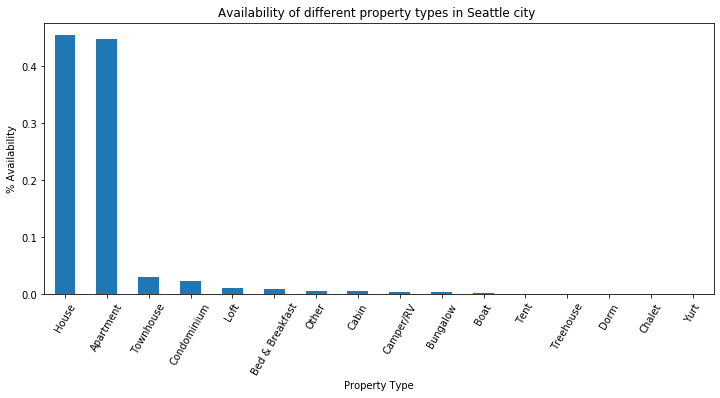

In [31]:
# Data Visualization for questions 1 & 2
prop_type = dfs_listings.property_type.value_counts()
plt.figure(figsize=(12,5));
(prop_type/dfs_listings.shape[0]).plot(kind='bar');
plt.xticks(rotation=60);
plt.title('Availability of different property types in Seattle city ');
plt.xlabel('Property Type');
plt.ylabel('% Availability');
# output 1- Apartment are most available accomodation in Boston

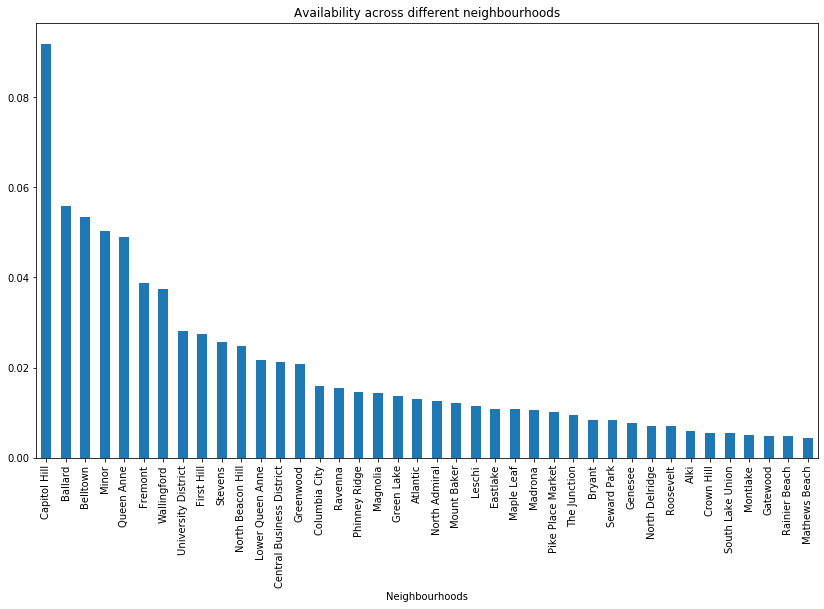

In [32]:
#Exploring neighbourhood and neighbourhood distribution
neighbourhood = dfs_listings.neighbourhood.value_counts()[:40]
plt.figure(figsize=(14,8))
(neighbourhood/dfs_listings.shape[0]).plot(kind="bar");
plt.title("Availability across different neighbourhoods");
plt.xlabel('Neighbourhoods');
# output 2- Neighbourhoods with most and least availability

In [34]:
#Data cleaning
#dropping rows with Nan values anywhere in the calendar and review data
dfs_calendar = dfs_calendar.dropna(axis = 0, subset = ['price'], how = 'any')
dfs_reviews = dfs_reviews.dropna(axis = 0, subset = ['comments'], how = 'any')
#Stripping date column(object type) to month, year and day
dfs_calendar['date'] = pd.to_datetime(dfs_calendar['date'])
dfs_calendar['month'] = dfs_calendar.date.dt.month
dfs_calendar['year'] = dfs_calendar.date.dt.year
dfs_calendar['day'] = dfs_calendar.date.dt.day

In [35]:
# Data cleaning for price column
# Function to convert price columns masquerading as object type columns & removing the $, symbols
def str_to_num(df,column):
    """Description: This function is for the price columns. They are object types.
    Covert datatype to string and removes the $ and quotes. 
    
    Arguments: 
    column: price
    df: dataframe
    
    Returns: 
    return the price columns back as float"""
    df[column] = pd.to_numeric(df[column].apply(lambda x : str(x).replace('$','').replace(",",'')),errors='coerce')
    return df

columns = ['price','monthly_price','weekly_price','security_deposit','cleaning_fee', 'extra_people']

for col in columns:
    dfs_listings = str_to_num(dfs_listings,col)
    

In [36]:
# Gathering/Cleaning data for answering question 3 with City map
# Bedrooms & bathroom are attributes of the listing; Latitudes & longitudes reqd for city map
# Price is the feature of interest. For visulaization, only fully filled rows are included to keep it simple

piece_listings = dfs_listings[['property_type', 'neighbourhood', 'review_scores_value', 
                        'bathrooms', 'bedrooms', 'price', 'longitude', 'latitude']]
print(len(piece_listings))
new_listings = piece_listings.dropna(axis = 0, how = 'any')
print(len(new_listings))
new_listings.info()

3818
2840
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2840 entries, 0 to 3814
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        2840 non-null   object 
 1   neighbourhood        2840 non-null   object 
 2   review_scores_value  2840 non-null   float64
 3   bathrooms            2840 non-null   float64
 4   bedrooms             2840 non-null   float64
 5   price                2840 non-null   float64
 6   longitude            2840 non-null   float64
 7   latitude             2840 non-null   float64
dtypes: float64(6), object(2)
memory usage: 199.7+ KB


In [40]:
# Data cleaning for property_type (categorical)
def Filter_by_property_type(category, filepath):
    """Description: This function can be used to read the dataframe and seive out data by one property_type.
    
    Arguments: 
    category: category of the property_type
    filepath: datframe
    
    Returns: 
    A data frame including just that property_type"""
    
    property_type = [category]
    true_false_by_property = new_listings.property_type.isin(property_type) 
    table1 = new_listings[true_false_by_property]
    return table1

In [44]:
# data visualtization - Mapping the apartment available across Seattle using Folium for question 3
def map_plot(x, y, data_list):
    """The latitude and longitude columns in data is already given. So plot the seattle map 
    Then we use group the data according to a list. 
    The desired list is derived from the property_type (generated b Filter_by_property_type)
    
    Arguements: 
        latitude: columns containing latitude coordinates.
        longitude: columns containing longitude coordinates.
        data_list: Data list where columns are held.
    
    Returns:
    Clustered map of all data points."""
    
    #Creates a map of Seattle.
    m = folium.Map(location=[47.60, -122.24], zoom_start = 12)
    m.save('index.html')


    #Takes the latitude and longitude coordinates and zips them into a form to be plotted.
    lat = pd.to_numeric(data_list[x], errors = 'coerce')
    lon = pd.to_numeric(data_list[y], errors = 'coerce')

    #Zip togethers each list of latitude and longitude coordinates. 
    result = zip(lat,lon)
    lat_lon = list(result)


    mc = MarkerCluster().add_to(m)
    for i in range(0,len(data_list)):
        folium.Marker(location=lat_lon[i]).add_to(mc)

    m.save('index.html')
    display(m)

In [45]:
# Data Analysis or gathering for data visulaization step
#Choosing House type accomodation for the maps as they are most vailable in Boston (output -1)
House_list1 = Filter_by_property_type('House', new_listings)
House_list1

,property_type,neighbourhood,review_scores_value,bathrooms,bedrooms,price,longitude,latitude
2,House,Queen Anne,10.0,4.5,5.0,975.0,-122.369483,47.629724
4,House,Queen Anne,9.0,2.0,3.0,450.0,-122.372471,47.632918
5,House,Queen Anne,10.0,1.0,1.0,120.0,-122.366174,47.630525
6,House,Queen Anne,10.0,1.0,1.0,80.0,-122.368519,47.636605
10,House,Queen Anne,10.0,1.0,1.0,95.0,-122.358478,47.635482
...,...,...,...,...,...,...,...,...
3803,House,Fremont,10.0,3.5,4.0,250.0,-122.349238,47.661131
3806,House,Fremont,10.0,1.0,2.0,160.0,-122.354514,47.656057
3808,House,Fremont,9.0,2.0,3.0,175.0,-122.350485,47.662036
3810,House,Fremont,8.0,1.0,2.0,154.0,-122.352604,47.654205


In [46]:
map_plot('latitude', 'longitude', House_list1)
# Output 3 - Seattle map showing house availability in different neighbourhoods

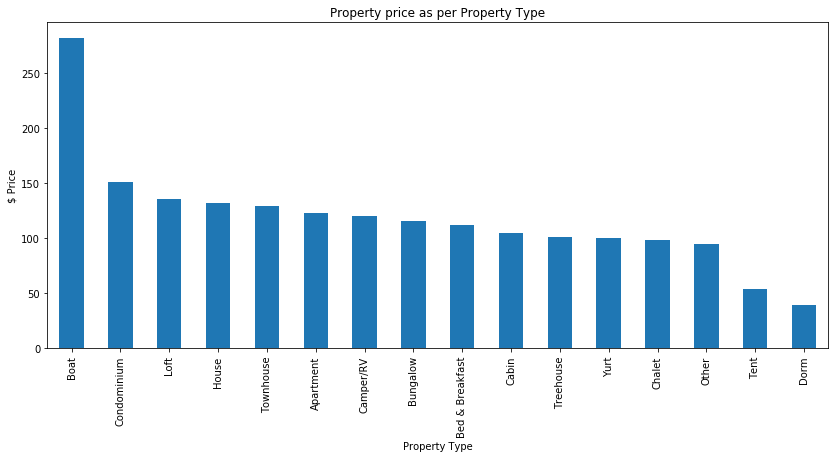

In [47]:
# Data visulaization - Price and accommodation types among the listings (question 4)
plt.figure(figsize=(14,6));
dfs_listings.groupby(['property_type'])['price'].mean().sort_values(ascending=False).plot(kind='bar');
plt.title('Property price as per Property Type');
plt.xlabel('Property Type');
plt.ylabel('$ Price');
#Output 4 - Price distribution across different property types

In [48]:
# Common column/feature - listing_id; dfs2 has the same column named as 'id'. Chnage this to listing_id

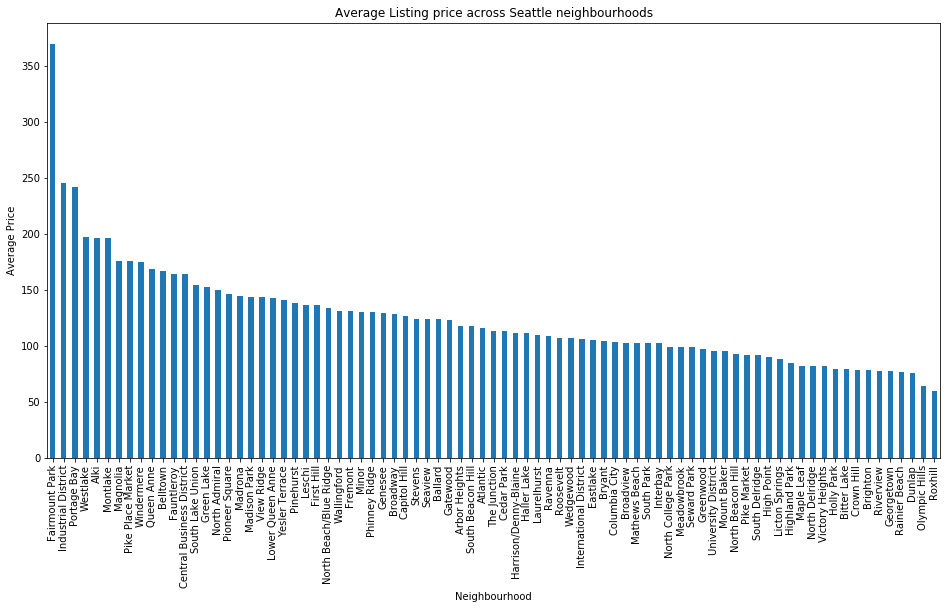

In [49]:
#Data Visulaization - Average price distribution across different neighbourhoods (question 4)
(dfs_listings.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)).plot(kind="bar", figsize=(16,8));
plt.title("Average Listing price across Seattle neighbourhoods");
plt.xlabel('Neighbourhood');
plt.ylabel('Average Price');
#Output 5 - Most expensive and least expensive neighbourhoods

In [52]:
# to clean the price and convert it into a float 
dfs_calendar['date'] = pd.to_datetime(dfs_calendar.date)
dfs_calendar = dfs_calendar.dropna(subset=['price'], axis = 0)
dfs_calendar = str_to_num(dfs_calendar,'price')
# add month and year column to the calender dataset
dfs_calendar['month'], dfs_calendar['year'] = dfs_calendar.date.dt.month, dfs_calendar.date.dt.year

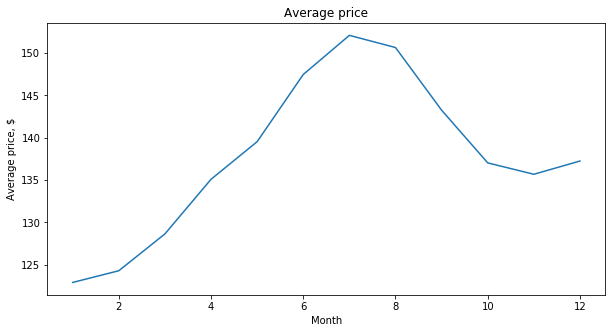

In [53]:
# Data visulatization - Average booking price across the different months of the year
average_price_by_month = dfs_calendar.groupby(['month'])['price'].mean()
plt.figure(figsize=(10,5))
plt.plot(average_price_by_month)
plt.ylabel('Average price, $')
plt.xlabel('Month')
plt.title('Average price')

plt.savefig('averagePrice_year')

plt.show()
# Output 6 - Price peaking and ebbing seasons

In [54]:
numcols_dfs2_corr = dfs_listings_corr.select_dtypes(include = ['float', 'int']).copy()
numcols_dfs2_corr.shape


(3818, 15)

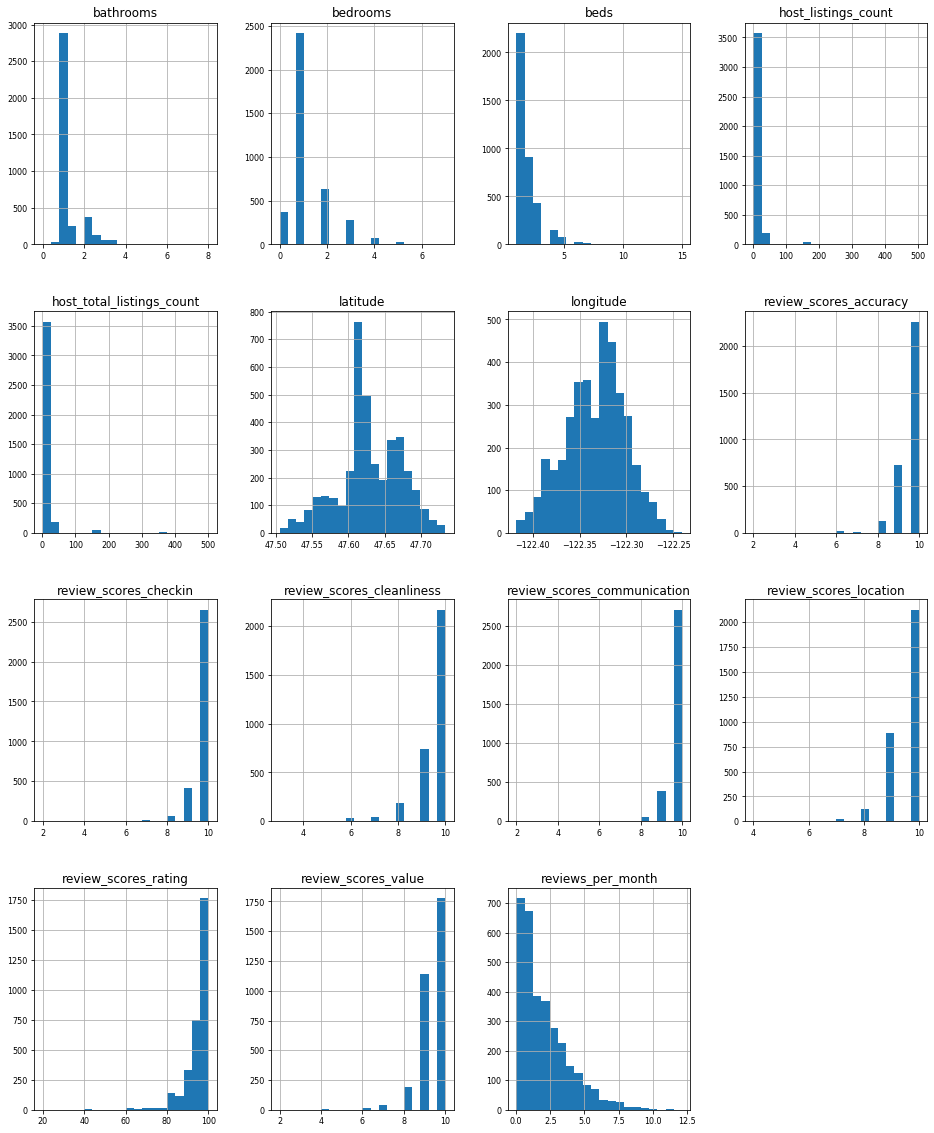

In [55]:
# without any changes, a set of plots with the existing numerical columns. Anything interesting in them?
numcols_dfs2_corr.hist(figsize=(16, 20), bins=20, xlabelsize=8, ylabelsize=8);

In [56]:
# data analysis - pricing and availability acorss the year  - quqestion 5
available_count_daily = dfs_calendar.groupby('date').count()[['price']]
available_count_daily = available_count_daily.rename({"price":"total_available_houses"},axis='columns')

average_price_daily = dfs_calendar.groupby('date').mean()[['price']]
# change column name
average_price_daily = average_price_daily.rename({"price":"average_prices"},axis='columns')

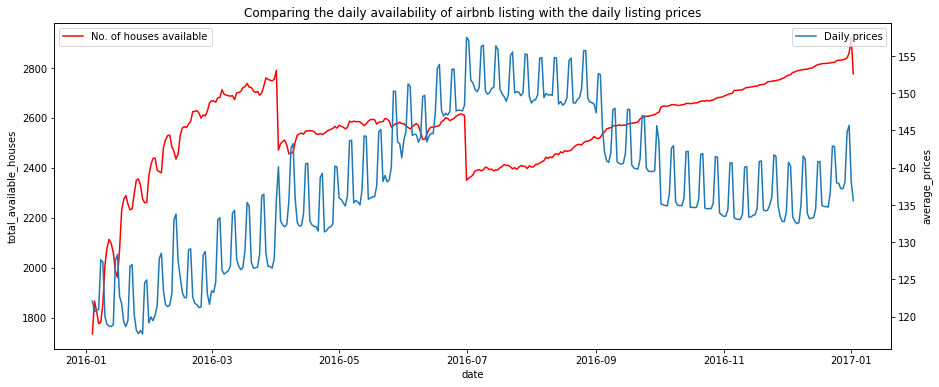

In [57]:
# Data vizulaisation - plot total available houses and average prices in one figure
f, ax = plt.subplots(figsize=(15, 6))
plt1 = sns.lineplot(x = available_count_daily.index,y = 'total_available_houses', 
                  data = available_count_daily,color="r",legend=False,label='No. of houses available')

ax2 = ax.twinx()
plt2 = sns.lineplot(x = average_price_daily.index,y = 'average_prices',
             data=average_price_daily,ax=ax2,linestyle=':', legend=False,label='Daily prices')
ax.set_title('Comparing the daily availability of airbnb listing with the daily listing prices');
ax2.legend();
ax.legend();
plt.savefig('CompareAvailabilityPriceWithDates.png')
#Output 7-  dips in availability in April and july?